In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

##Problema de negocio: Optimización del catálogo de Netflix para mejorar la retención de usuarios

Netflix quiere mejorar la retención de usuarios y maximizar la relevancia del contenido disponible en su plataforma. El equipo de análisis de datos ha recibido la tarea de analizar el catálogo de títulos (películas y programas de TV) con el objetivo de:

Identificar los patrones de contenido más populares: ¿Qué tipo de contenido (películas vs. series) o géneros específicos tienen más éxito entre los usuarios? ¿En qué países se producen los títulos más exitosos?

Optimizar las adquisiciones futuras: ¿Qué tipo de contenido debería adquirir Netflix en el futuro para mantener el interés de los usuarios? ¿Existen géneros o categorías que son subrepresentados pero muestran un aumento de popularidad?

Mejorar las recomendaciones: Basado en el análisis del contenido actual, ¿cómo puede Netflix mejorar su motor de recomendaciones para ofrecer contenido relevante en diferentes mercados geográficos y grupos demográficos?

Objetivos clave:

Analizar el contenido por país de origen, género, clasificación por edades y año de lanzamiento para detectar patrones de éxito.

Determinar si las películas o las series contribuyen más a la retención de usuarios y la adquisición de nuevos suscriptores.

Explorar las tendencias en los lanzamientos a lo largo del tiempo para identificar posibles mercados emergentes o géneros que podrían atraer a nuevos usuarios.

Métricas de éxito:

Tasa de retención de usuarios: La cantidad de usuarios que permanecen suscritos en función del contenido nuevo disponible.
    
Tasa de engagement: Medida por la cantidad de tiempo que los usuarios pasan viendo películas y programas de TV en ciertas categorías o de ciertos países.
    
Optimización del catálogo: La capacidad de Netflix para adquirir contenido que alinee sus ofertas con las preferencias de los usuarios en diversas regiones y géneros.

#Set de datos

In [3]:
df_netflix = pd.read_csv('netflix_titles.csv',sep=',',index_col='show_id')

In [4]:
df_netflix.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


show_id: ID único del título.

type: Tipo de contenido (película o programa de TV).

title: Nombre del título.

director: Nombre del director (si está disponible).

cast: Lista de actores principales.

country: País donde se produjo el contenido.

date_added: Fecha en que el título fue añadido a Netflix.

release_year: Año en que se lanzó el título.

rating: Clasificación por edades.

duration: Duración (en minutos o número de temporadas).

listed_in: Categorías en las que está listado el título.

description: Breve descripción del contenido.

In [5]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


In [6]:
print(df_netflix.shape)

(8807, 11)


#Limpieza de datos
Las columnas director, cast, country, date_added, rating y duration tienen valores nulos.

In [7]:
#Verificar datos duplicados
duplicates = df_netflix.duplicated().sum()
print(f'Filas duplicadas: {duplicates}')

Filas duplicadas: 0


In [8]:
#Se llena la columna director con el valor 'Unknown'
df_netflix['director']=df_netflix['director'].fillna('Unknown')

In [9]:
#Se llena la columna cast con el valor 'Unknown'
df_netflix['cast']=df_netflix['cast'].fillna('Unknown')

In [10]:
#Se llena la columna country con el valor 'Unkown'
df_netflix['country']=df_netflix['country'].fillna('Unknown')

In [11]:
#Solo hay 10 datos faltantes en la columna "Date_added" se proceden a eliminar los datos
df_netflix.dropna(subset=['date_added'],inplace=True)

In [12]:
#hay 4 entradas en la columna raitings que no tienen calificación, se eliminan esas entradas
df_netflix.dropna(subset=['rating'],inplace=True)

In [13]:
#Se eliminan las entradas con datos nulos en la columna duración
df_netflix.dropna(subset=['duration'],inplace=True)

In [14]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8790 non-null   object
 1   title         8790 non-null   object
 2   director      8790 non-null   object
 3   cast          8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
 10  description   8790 non-null   object
dtypes: int64(1), object(10)
memory usage: 824.1+ KB


In [15]:
df_netflix.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [16]:
#Eliminar columnas que no son relevantes para el problema del negocio, tales son : cast,description,title y director
df_netflix.drop(['cast','description','title','director'],axis=1,inplace=True)

In [17]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, s1 to s8807
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8790 non-null   object
 1   country       8790 non-null   object
 2   date_added    8790 non-null   object
 3   release_year  8790 non-null   int64 
 4   rating        8790 non-null   object
 5   duration      8790 non-null   object
 6   listed_in     8790 non-null   object
dtypes: int64(1), object(6)
memory usage: 549.4+ KB


In [18]:
df_netflix.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [19]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {df_netflix.shape}')
df_netflix.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {df_netflix.shape}')

Tamaño del set antes de eliminar las filas repetidas: (8790, 7)
Tamaño del set después de eliminar las filas repetidas: (8718, 7)


In [23]:
# Calcular el número de categorías para cada título
df_netflix['num_categorias'] = df_netflix['listed_in'].apply(lambda x: len(x.split(', ')))

# Visualizar la nueva columna
df_netflix[['listed_in', 'num_categorias']].head()



,listed_in,num_categorias
show_id,,
s1,Documentaries,1
s2,"International TV Shows, TV Dramas, TV Mysteries",3
s3,"Crime TV Shows, International TV Shows, TV Act...",3
s4,"Docuseries, Reality TV",2
s5,"International TV Shows, Romantic TV Shows, TV ...",3


In [22]:
df_netflix['country'].unique()

array(['United States', 'South Africa', 'Unknown', 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, Unit

In [ ]:
import seaborn as sns

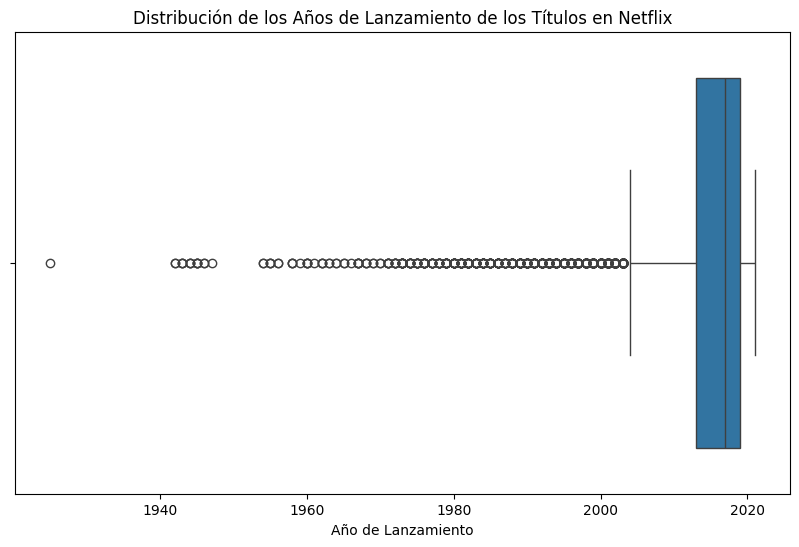

In [ ]:
# Generar gráficas individuales pues las variables numéricas
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el boxplot de 'release_year'
sns.boxplot(x=df_netflix['release_year'])

# Configurar el título y las etiquetas
plt.title('Distribución de los Años de Lanzamiento de los Títulos en Netflix')
plt.xlabel('Año de Lanzamiento')

# Mostrar el gráfico
plt.show()

#Analisis Exploratorio de datos (EDA)

In [ ]:
def graficos_eda_categoricos(cat):
    import matplotlib.pyplot as plt
    from math import ceil

    # Calculamos el número de filas que necesitamos
    filas = ceil(cat.shape[1] / 2)

    # Definimos el gráfico
    f, ax = plt.subplots(nrows=filas, ncols=2, figsize=(16, filas * 6))

    # Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat

    # Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        # Calcular los porcentajes
        value_counts = cat[variable].value_counts(normalize=True) * 100

        # Crear gráfico de barras horizontales
        value_counts.plot.barh(ax=ax[cada])

        # Configuración del gráfico
        ax[cada].set_title(variable, fontsize=12, fontweight="bold")
        ax[cada].tick_params(labelsize=12)

        # Añadir los porcentajes al lado de cada barra
        for i, (count, percent) in enumerate(zip(value_counts.values, value_counts.index)):
            ax[cada].text(count, i, f'{count:.2f}%', va='center', fontsize=10)

    # Ajustar diseño para mejor visualización
    plt.tight_layout()
    plt.show()

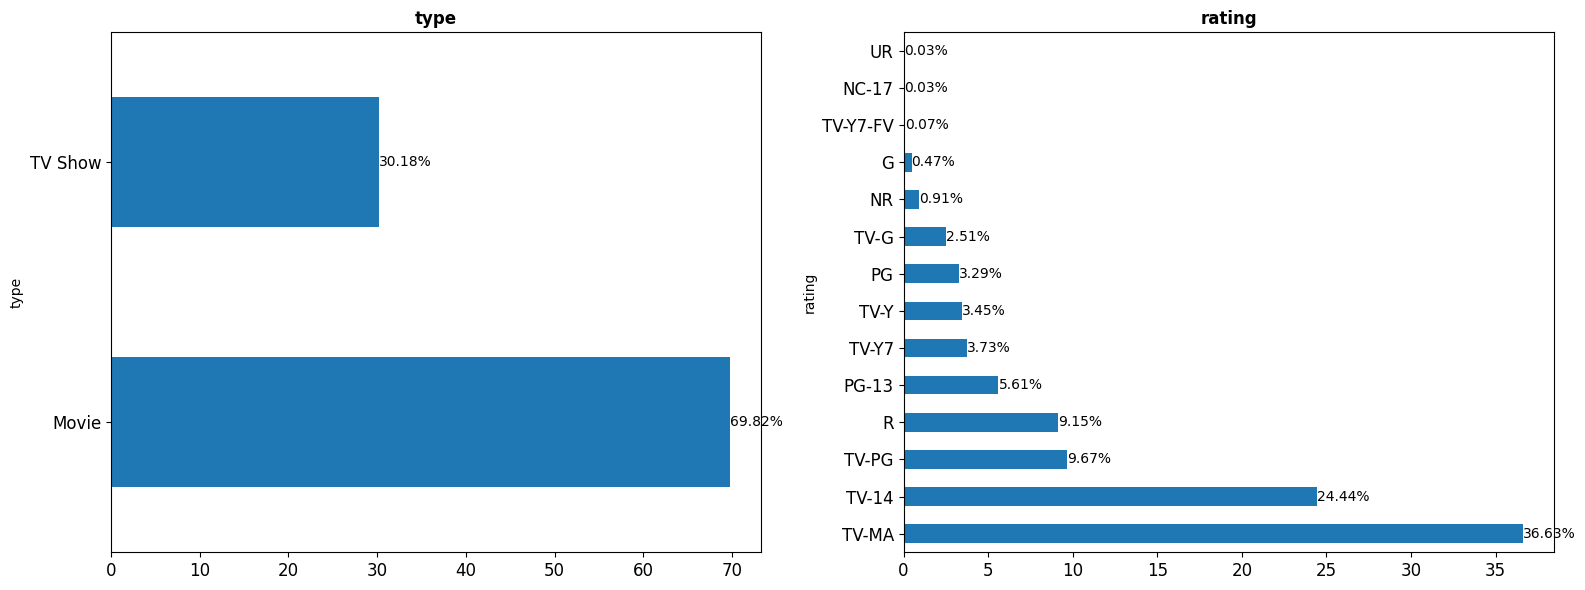

In [ ]:
cat = df_netflix[['type','rating',]]
graficos_eda_categoricos(cat)

<ipython-input-23-813f7b6051a5>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries_percent.values, y=top_countries_percent.index, palette="mako")


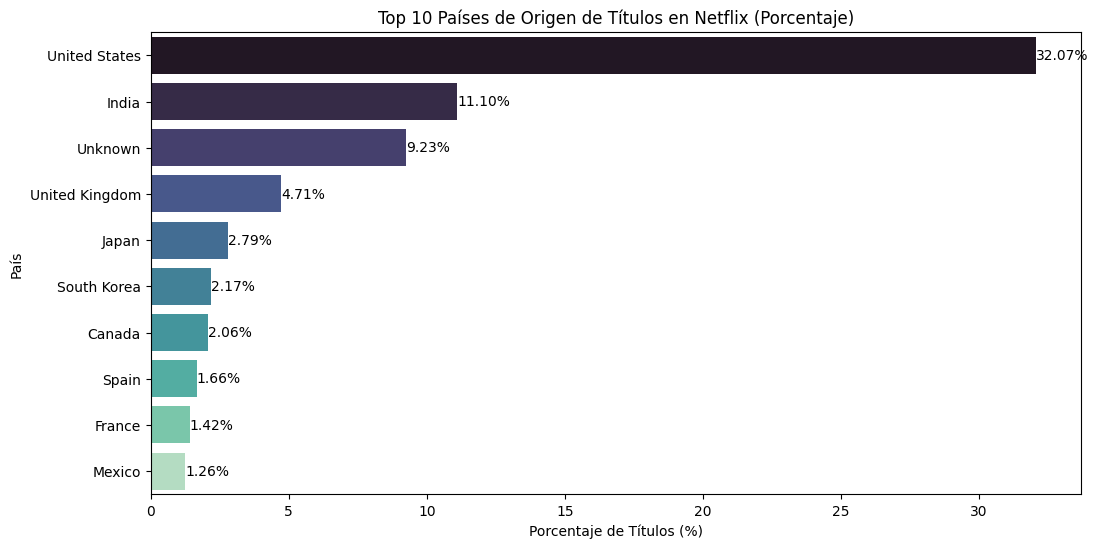

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la frecuencia de cada país
country_counts = df_netflix['country'].value_counts()

# Calcular el porcentaje
country_percentages = (country_counts / country_counts.sum()) * 100

# Seleccionar los 10 principales países por porcentaje
top_countries_percent = country_percentages.head(10)

# Crear un gráfico de barras con porcentajes
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries_percent.values, y=top_countries_percent.index, palette="mako")
plt.title('Top 10 Países de Origen de Títulos en Netflix (Porcentaje)')
plt.xlabel('Porcentaje de Títulos (%)')
plt.ylabel('País')

# Mostrar el valor del porcentaje en cada barra
for i, value in enumerate(top_countries_percent.values):
    plt.text(value, i, f'{value:.2f}%', va='center')

plt.show()


<ipython-input-24-cc83d5000e0b>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frecuencia', y='Categoria', data=top_10_categorias, palette='viridis')


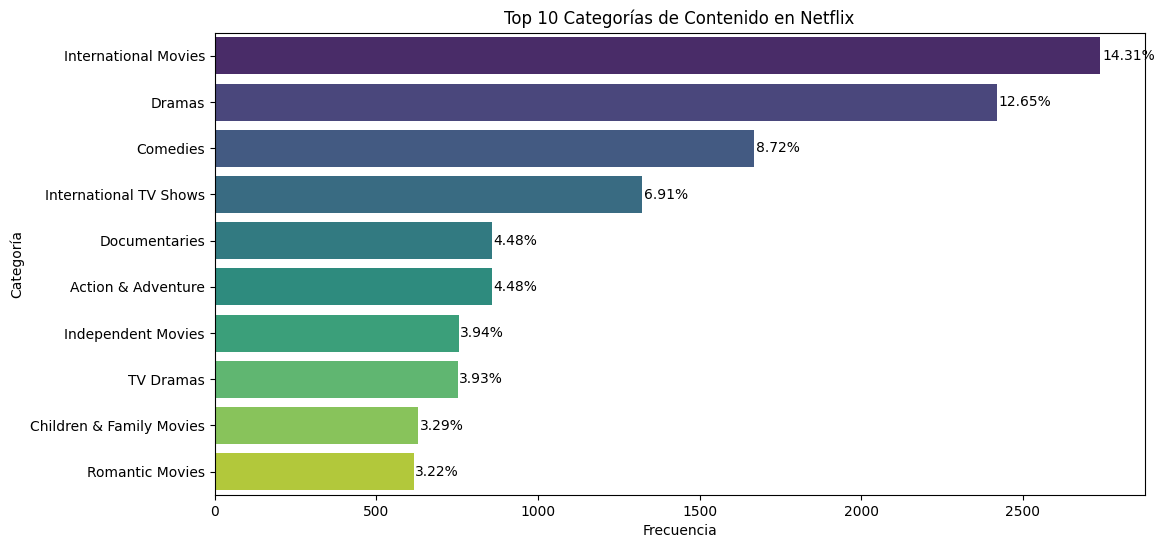

In [ ]:
# Desglosar y contar categorías individuales en 'listed_in'
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Separar las categorías y crear una lista de todas las etiquetas
categorias = df_netflix['listed_in'].str.split(', ').sum()

# Contar la frecuencia de cada categoría
conteo_categorias = Counter(categorias)

# Convertir a un DataFrame
df_categorias = pd.DataFrame(conteo_categorias.items(), columns=['Categoria', 'Frecuencia'])
df_categorias['Porcentaje'] = (df_categorias['Frecuencia'] / df_categorias['Frecuencia'].sum()) * 100
df_categorias = df_categorias.sort_values(by='Frecuencia', ascending=False)

# Visualizar las 10 categorías principales con porcentajes
plt.figure(figsize=(12, 6))
top_10_categorias = df_categorias.head(10)
sns.barplot(x='Frecuencia', y='Categoria', data=top_10_categorias, palette='viridis')

# Añadir porcentajes al final de cada barra
for index, value in enumerate(top_10_categorias['Frecuencia']):
    porcentaje = f"{top_10_categorias['Porcentaje'].iloc[index]:.2f}%"
    plt.text(value + 5, index, porcentaje, va='center', fontsize=10)

plt.title('Top 10 Categorías de Contenido en Netflix')
plt.xlabel('Frecuencia')
plt.ylabel('Categoría')
plt.show()

#Conclusiones EDA

Netflix posee en su catalogo:

*  69,82% de películas
*  30,18% series de televisión.

El top 3 de calificación por edades son:

*   TV-MA  (36,66%)
*   ETV-14 (24,44%)
*   TV-PG (9,67%)


Los paises con mas producciones son:


*   Estados Unidos (32,07%)
*   India (11,10%)
*   Desconocido  (9,23%)

El top 3 de categorias de netflix son:

*  Peliculas internacionales (14,31%)
*  Dramas (12,65%)
*  Comedia (8,72%)





#Tareas interesantes a realizar

#Que tipo de contenido hay en cada pais

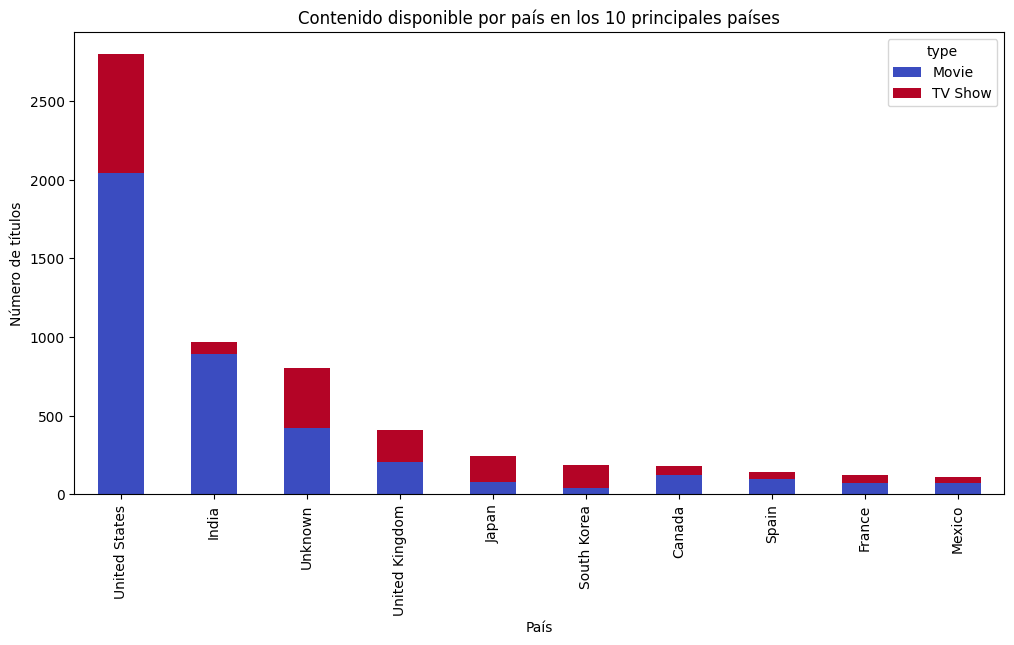

In [ ]:
# Agrupar por país y tipo
contenido_pais = df_netflix.groupby(['country', 'type']).size().unstack().fillna(0)

# Visualizar los principales países
top_10_paises = contenido_pais.sum(axis=1).sort_values(ascending=False).head(10).index
contenido_top10 = contenido_pais.loc[top_10_paises]

contenido_top10.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Contenido disponible por país en los 10 principales países')
plt.xlabel('País')
plt.ylabel('Número de títulos')
plt.show()

#Identificar si Netflix tine mas enfoque en las series de television o en peliculas

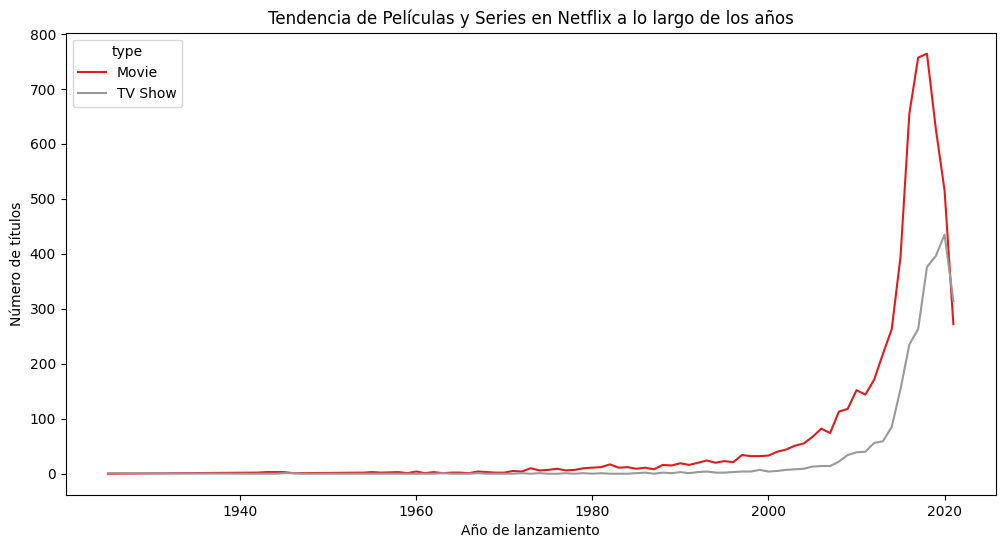

In [ ]:
# Agrupar por año de lanzamiento y tipo
tendencia_tipo = df_netflix.groupby(['release_year', 'type']).size().unstack().fillna(0)

# Visualizar la tendencia
tendencia_tipo.plot(kind='line', figsize=(12, 6), colormap='Set1')
plt.title('Tendencia de Películas y Series en Netflix a lo largo de los años')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de títulos')
plt.show()


In [ ]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8718 entries, s1 to s8807
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8718 non-null   object
 1   country       8718 non-null   object
 2   date_added    8718 non-null   object
 3   release_year  8718 non-null   int64 
 4   rating        8718 non-null   object
 5   duration      8718 non-null   object
 6   listed_in     8718 non-null   object
dtypes: int64(1), object(6)
memory usage: 802.9+ KB


In [ ]:
# Exportar el DataFrame limpio a un archivo CSV
df_netflix_onehot.to_csv('netflix_cleaned_data.csv', index=False)

In [ ]:
from google.colab import files